# **Polynomial Linear Regression**
- Polynomial Regression is a form of regression analysis where the relationship between the independent variable 𝑋 and the dependent variable 𝑌 is 𝑛-th degree polynomial in 𝑋

## Why Use Polynomial Regression?
- Capturing Non-Linearity: Linear models may not adequately capture complex relationships in the data. Polynomial regression can model curves and bends in the data more accurately.

- Flexibility: By increasing the degree of the polynomial, you can fit the model more closely to the data. However, higher degrees also risk overfitting (fitting noise in the data), so it's essential to balance model complexity.

## Importing Required Libraries

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures # Dimentionality Increase

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# **Simple Linear Regression**

## Generating Polynomial data

In [40]:
# y = 0.6x^2 + 0.1x + 2.3 + Some Noise
np.random.seed(2)
X = 6 * np.random.randn(200) + 3
y = (0.6*X**2) - (0.1*X) + 2.3 + np.random.randint(-50, 50, size = 200)

## Train Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

## Slope and Intercept

In [7]:
print(lr.coef_, lr.intercept_)

[4.75979249] 19.658276932076884


## Plotting Scatter Plot

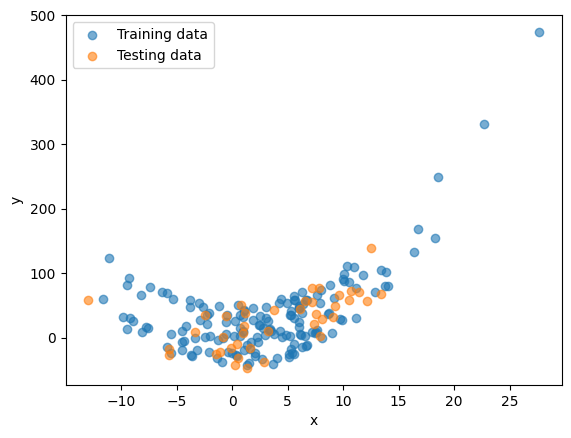

In [8]:
plt.scatter(X_train, y_train, alpha = 0.6)
plt.scatter(X_test, y_test, alpha = 0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Training data', 'Testing data'])
plt.show()

## Model Prediction and r2_score

In [9]:
y_pred = lr.predict(X_test.reshape(-1, 1))

In [10]:
r2_score(y_test, y_pred)

0.2577903973559794

## Plotting Best Fit Line

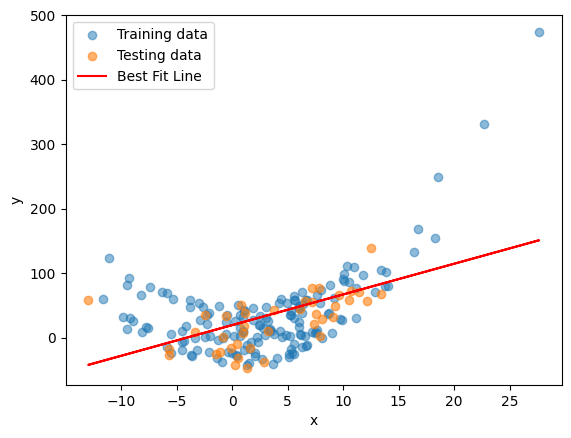

In [11]:
plt.scatter(X_train, y_train, alpha = 0.5)
plt.scatter(X_test, y_test, alpha = 0.6)
plt.plot(X, lr.predict(X.reshape(-1, 1)), color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Training data', 'Testing data' , 'Best Fit Line'])
plt.show()

As you observe the behavour of best fit line only following the linear relationship, since there are no any higher degree variables

# **Simple Polynomial Linear Regression**
## Feature Transformation
- PolynomialFeatures() used to transforma the data into its degrees (x^0, x^2, x^2...)

In [12]:
poly = PolynomialFeatures(degree = 4)
x_train_trans = poly.fit_transform(X_train.reshape(-1, 1))
x_test_trans = poly.transform(X_test.reshape(-1, 1))

In [13]:
x_train_trans[:5]
# 1st column : x^0
# 2nd column : x^1
# 3nd column : x^2

array([[ 1.00000000e+00, -9.20079928e+00,  8.46547073e+01,
        -7.78890970e+02,  7.16641947e+03],
       [ 1.00000000e+00,  6.31898564e+00,  3.99295796e+01,
         2.52314440e+02,  1.59437133e+03],
       [ 1.00000000e+00,  3.00005857e+00,  9.00035142e+00,
         2.70015814e+01,  8.10063256e+01],
       [ 1.00000000e+00,  9.67068204e-01,  9.35220911e-01,
         9.04422406e-01,  8.74638152e-01],
       [ 1.00000000e+00,  1.05851958e+00,  1.12046370e+00,
         1.18603276e+00,  1.25543890e+00]])

In [14]:
poly_lr = LinearRegression()

In [15]:
poly_lr.fit(x_train_trans, y_train)

LinearRegression()

## Model prediction and r2_score

In [16]:
y_pred = poly_lr.predict(x_test_trans)

If you compare current r2_score(0.47) with r2_score(0.25) of simple linear regression, it is increased

In [17]:
r2_score(y_test, y_pred)

0.47780125648803495

## Slopes and Intercept

In [18]:
poly_lr.coef_

array([ 0.00000000e+00, -1.13291167e-01,  5.34758272e-01,  2.45932013e-04,
        1.13665583e-04])

In [19]:
poly_lr.intercept_

4.397309340144346

## Plotting Best Fit Curve
- The nature of graph is not the perfect for line plots as the values are not in sorted order.
- The random nature of X values are in -15 to 25, so generated same pattern values using linspace function

In [20]:
x_new = np.linspace(-15, 25, num = 200)
x_new_trans = poly.transform(x_new.reshape(-1, 1))
y_new = poly_lr.predict(x_new_trans)

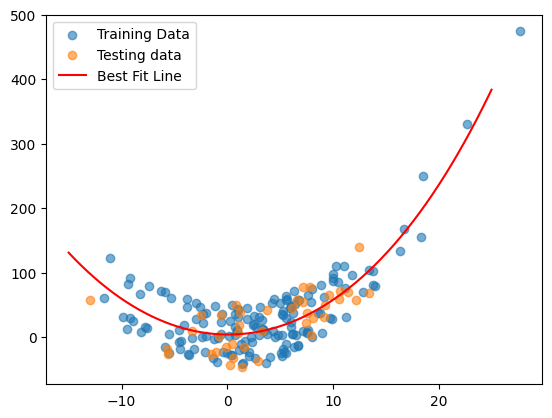

In [21]:
plt.scatter(X_train, y_train, label = 'Training Data', alpha = 0.6)
plt.scatter(X_test, y_test, label = 'Testing data', alpha = 0.6)
plt.plot(x_new, y_new, color = 'red', label = 'Best Fit Line')
plt.legend()
plt.show()

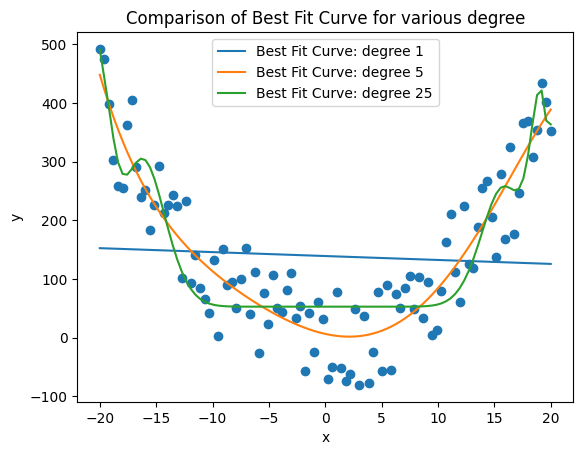

In [22]:
X = 6 * np.random.randn(200) + 3
y = (0.6*X**2) - (0.1*X) + 2.3 + np.random.randint(-30, 30, size = 200)

def polynomial_regressor(X, y, degree = 5):
    feture_model = PolynomialFeatures(degree=degree)
    X = feture_model.fit_transform(X.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X, y.reshape(-1, 1))
    y_pred = model.predict(X)
    return y_pred

degrees = [1, 5, 25]
temp_x = np.linspace(-20, 20, 100)
temp_y = (temp_x**2) - (temp_x) + 2.3 + np.random.randint(-100, 100, size = 100)
plt.scatter(temp_x, temp_y)
for degree in degrees:
    y_pred = polynomial_regressor(temp_x, temp_y, degree=degree)
    plt.plot(temp_x, y_pred, label = f"Best Fit Curve: degree {degree}")

plt.xlabel('x')
plt.ylabel('y')
plt.title("Comparison of Best Fit Curve for various degree")
plt.legend()
plt.show()

## Learning Curves

1. Underfitting: If both the training and validation errors are high and relatively close to each other, it indicates that the model is too simple to capture the underlying patterns in the data. This is known as underfitting.

2. Overfitting: If the training error is very low while the validation error is high, it indicates that the model is too complex and is capturing noise in the training data rather than generalizing to unseen data. This is known as overfitting.

3. Interpretation: If both the training and validation errors are low and the curves are close together, it indicates that the model is well-fitted. It captures the underlying patterns in the data without overfitting or underfitting.

[]

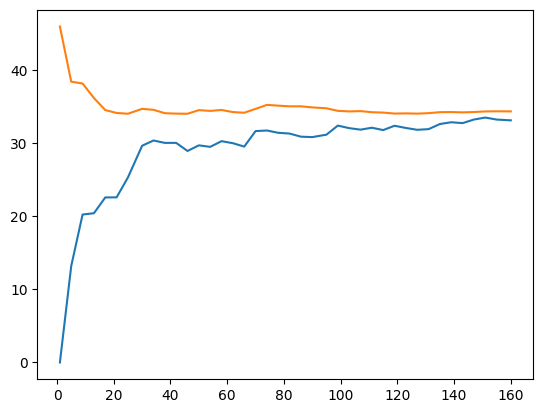

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X.reshape(-1, 1), y.reshape(-1, 1), train_sizes=np.linspace(0.01, 1, 40), cv = 5, scoring = 'neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label = "Training Error")
plt.plot(train_sizes, valid_errors, label = "Testing Error")
plt.plot()

# **Polynomial Regression using Gradient Descent**

(0.0, 60.0)

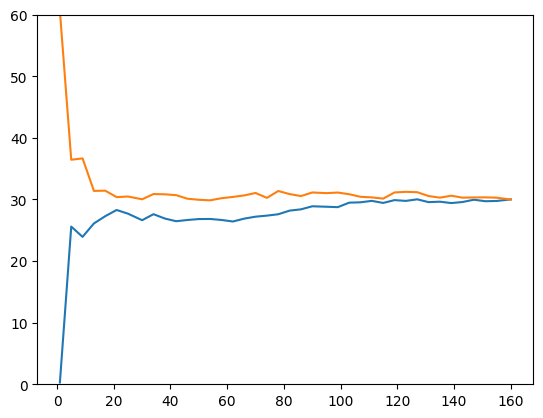

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

pr = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False), 
    SGDRegressor(
        loss='squared_error',
        penalty='l2',
        learning_rate='constant',
        eta0=0.01,
        max_iter=10000,
        alpha=0.001,
    ))

train_sizes, train_scores, valid_scores = learning_curve(
    pr, X.reshape(-1, 1), y, train_sizes=np.linspace(0.01, 1, 40), cv = 5, scoring = 'neg_root_mean_squared_error'
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors)
plt.plot(train_sizes, valid_errors)
plt.ylim(0, 60)

# **Polynomial Multiple Linear Regression**
- Polynomial multiple linear regression is an extension of multiple linear regression that allows for capturing more complex relationships between the inputs(Two and more) and outputs.

## Generating Data

In [25]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)

## Plotting 3D Scatter Plot

In [26]:
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

# **Multiple Linear Regression**

In [27]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

LinearRegression()

## Best Fit Hyperplane

In [28]:
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))
fig.show()

In [29]:
X_multi = np.array([x,y]).reshape(100,2)

# **Multiple Polynomial Linear Regression** 
## Feature Transformation
- Degree is a hyperparameter of Polynomaial Linear Regression

In [30]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(X_multi)

## poly.powers_ : The attribute which shows the possible degrees of each variable(column)
- The Sum must be less than equal to the highest degree
- Degree = 3 -> [2, 1] = 2 + 1 = 3 simillarly.

In [31]:
print("Powers\n",poly.powers_)

Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [32]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

## Model Prediction and r2_score

In [33]:
z_pred = lr.predict(X_multi_trans)

In [34]:
r2_score(z, z_pred)

0.09175846530784815

## Best Fit Hyperplane
In Polynomial Regression, the model aims to fit a curve (not just a straight line) to the data points. As you increase the degree of the polynomial, the model becomes more flexible and can capture intricate patterns in the data. However, this flexibility comes with a risk: the model may start to fit not just the underlying pattern but also the noise in the data. This phenomenon is known as overfitting.

In [35]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))
fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()